In [1]:
import datetime
import csv
import shutil
import tempfile

import requests
import tqdm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [8]:
def fetchIMMData(year, filepath, verbose = True):
    IMM_URL = "https://www.cftc.gov/files/dea/history/deacot{}.zip".format(year)
    r = requests.get(IMM_URL, stream=True)    
    file_size = int(r.headers['Content-Length'])
    chunk = 1
    chunk_size = 1024
    num_bars = int(file_size / chunk_size)
    
    if verbose:
        print(dict(file_size = file_size))
        print(dict(num_bars = num_bars))
        
    
    with tempfile.NamedTemporaryFile() as fp:
        print("Downloading data to temp file: {}".format(fp.name))
        for chunk in tqdm.tqdm(r.iter_content(chunk_size = chunk_size), 
                               total=num_bars, 
                               unit = 'KB', 
                               desc = filepath, 
                               leave = True):
            fp.write(chunk)
        fp.seek(0)
        print("Extracting data to {}".format(filepath))
        shutil.unpack_archive(fp.name, filepath, format = 'zip')

In [10]:
fetchIMMData(2020, "./Data/imm/")

./Data/imm/: 1045KB [00:00, 8439.24KB/s]                         

{'file_size': 1069348}
{'num_bars': 1044}
Extracting data to ./Data/imm/


In [4]:
def getDataDate(data, date):
    dt = datetime.datetime.strptime(date, "%Y-%m-%d")
    for d in data:
        if d[0] == dt: return d
    return None

In [25]:
def plotimm(data, title, currency):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    ax.bar(data[:, 0], data[:, 1], width=5, label="{} Long".format(currency))
    ax.bar(data[:, 0], data[:, 2], width=5, label="{} Short".format(currency))
    ax.plot(data[:, 0], data[:, 3], 'o-k', linewidth=2, label="Delta")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
    ax.legend(loc="lower right")

    plt.title(title)
    fig.autofmt_xdate()

In [16]:
jpy = []
euro = []
gbp = []
with open('Data/imm/annual.txt', newline='') as csvfile:
    imm = csv.reader(csvfile, delimiter=',')
    for row in imm:
        if row[0] == "JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE":            
            dt = datetime.datetime.strptime(row[2], "%Y-%m-%d")
            jpy.append([dt, int(row[8]), -int(row[9]), int(row[8]) - int(row[9])])
        if row[0] == "EURO FX - CHICAGO MERCANTILE EXCHANGE":
            dt = datetime.datetime.strptime(row[2], "%Y-%m-%d")
            euro.append([dt, int(row[8]), -int(row[9]), int(row[8]) - int(row[9])])

jpy = np.array(jpy)
euro = np.array(euro)

array([datetime.datetime(2020, 7, 28, 0, 0), 62924, -34417, 28507],
      dtype=object)

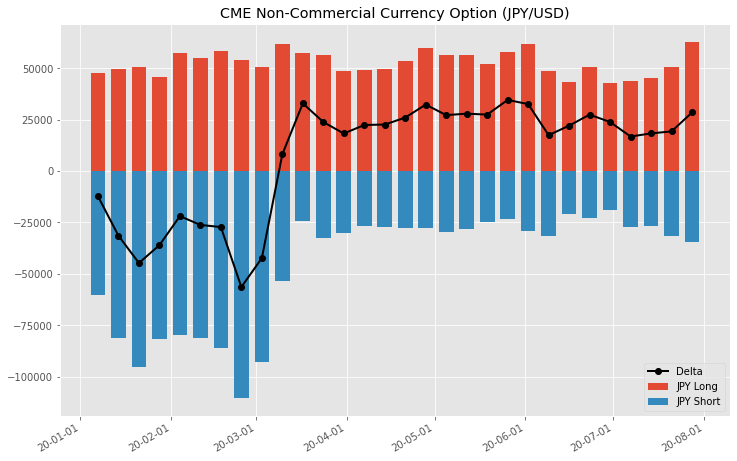

In [29]:
plotimm(jpy, "CME Non-Commercial Currency Option (JPY/USD)", "JPY")
getDataDate(jpy, "2020-07-28")

array([datetime.datetime(2020, 7, 28, 0, 0), 242127, -84568, 157559],
      dtype=object)

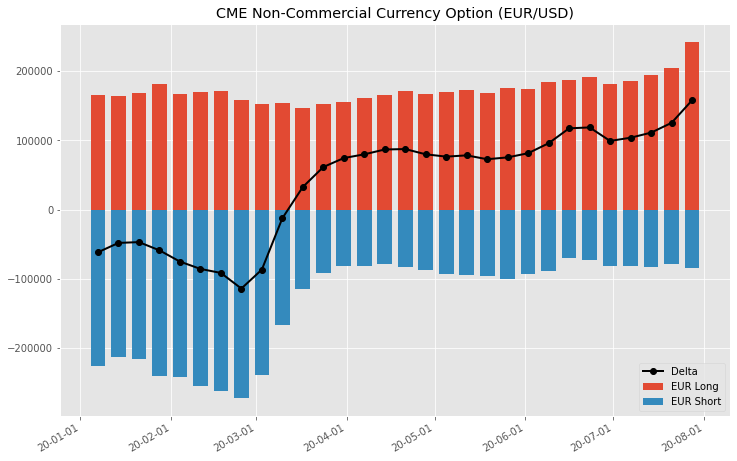

In [30]:
plotimm(euro, "CME Non-Commercial Currency Option (EUR/USD)", "EUR")
getDataDate(euro, "2020-07-28")